
# **Protein sequence Alignment of TEM-1 with 100 homologs**:
NCBI Blast protein alignment is used to align TEM-1 beta lactamase with 100 proteins.
For the blast search RefSeq library was selected. 

Results:
The alignemnt comprises 95 class A beta lactamases and 5 serine hydrolases. The Identity which reports on the percantage of matching amino acids between the aligned sequece and TEM-1 ranges from 47.5% - 99.65%.

# **Alignment Analysis** 
1. Alignment Heatmap
2. Calculation of conservation score & consensus sequence  
    2.1 Pei & Grishin conservation
    2.2 Shannon entropy
    2.3 Comparision of Pei & Grishin and Shannon conservation
    - Barplot
    - Correlation scatter plot 
3. Correlation of DMS and conservation scores
    - Correlation scatter Plots 
4. Concensus seqence Alignment with TEM1
    4.1 Self calculated concensus sequence 
    4.2 Emboss Concensus Sequence Calculation
    - Blosum62, PAM250
    - Blosum90
    - PAM460
    4.3 Reference Emboss alignment
    
5. Extended : DMS trend at important positions

6. Extended: Hypothesis testing 

        

       


# 1.Alignment Heatmap

In [40]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Creating the parameters for the heatmap

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'

# This is the fasta file with the 100 aligned sequences
fasta_file = "TEM-1_Alignment_100_Homolgs.aln"
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Converting fasta to list with 286 Positions
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 Positions
N = len(msa)#101 rows

#Creating empty data frame for the counted amino acids at each position
freq = np.zeros([L,21])

#creating the concensus sequence
concensus = np.zeros(L)

In [41]:
#Counts the amino acids for each position and selects the amino acid with the highest frequency for the concensus sequnece

for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])
        freq[j,j_aa] = freq[j,j_aa] + 1 
for i in range(0, L):
    concensus[i] = freq[i].argmax()



In [42]:
#Heatmap
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
            bbox=dict(facecolor=palette[aa.find(msa[j].seq[i])], alpha=0.5),fontdict=font)
        
figure


TypeError: 'dict' object is not callable

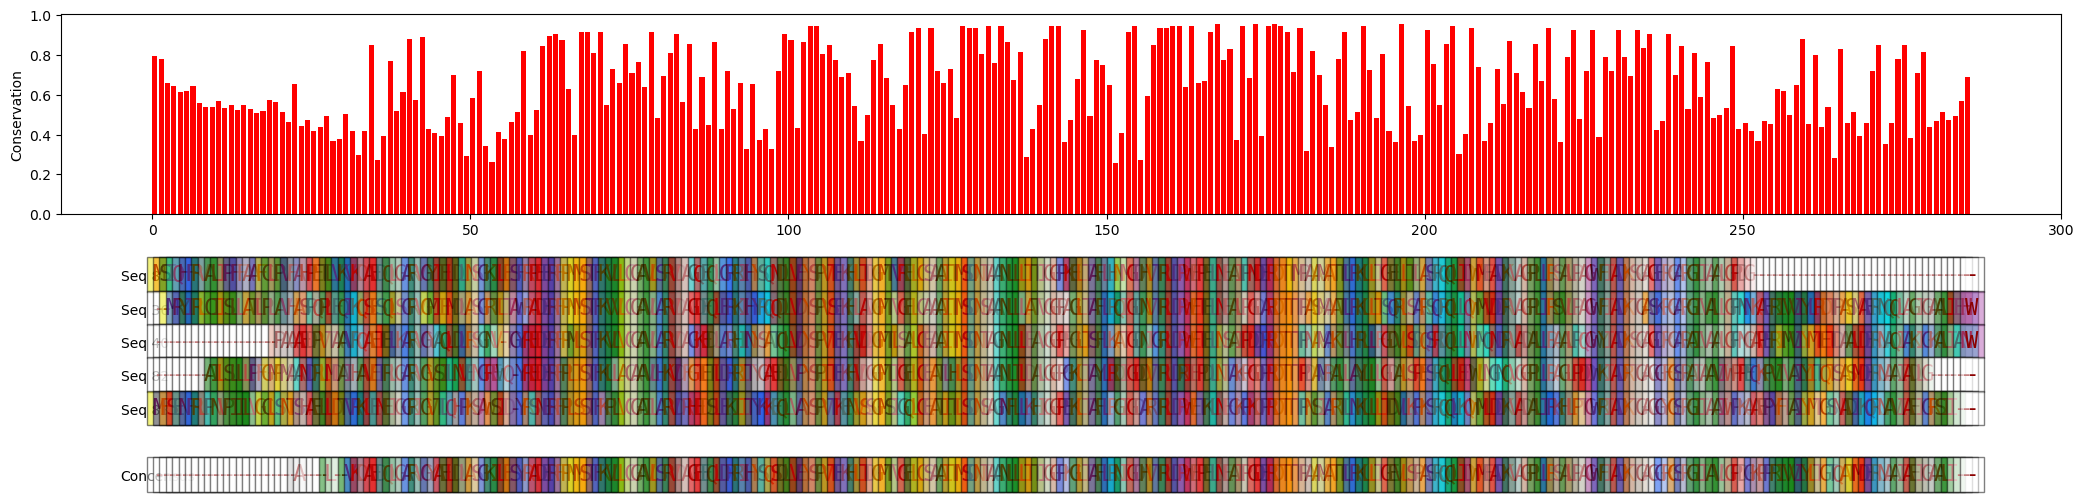

In [ ]:
#shows the concensus sequence at the bottom
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

# 2. Calculatuion of Conservation score & modeling of concensus sequence

## 2.1 Pei & Grishin conservation
Measures the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution over the whole alignment, which is 1/20 as a range of 20 amino acids can mutate into each position. 

     V = √∑(p_ia/N-E)^2
     max: V = 0 (each a 5x times in alignemnt)
     min: V = 0.95 (total conserved position)







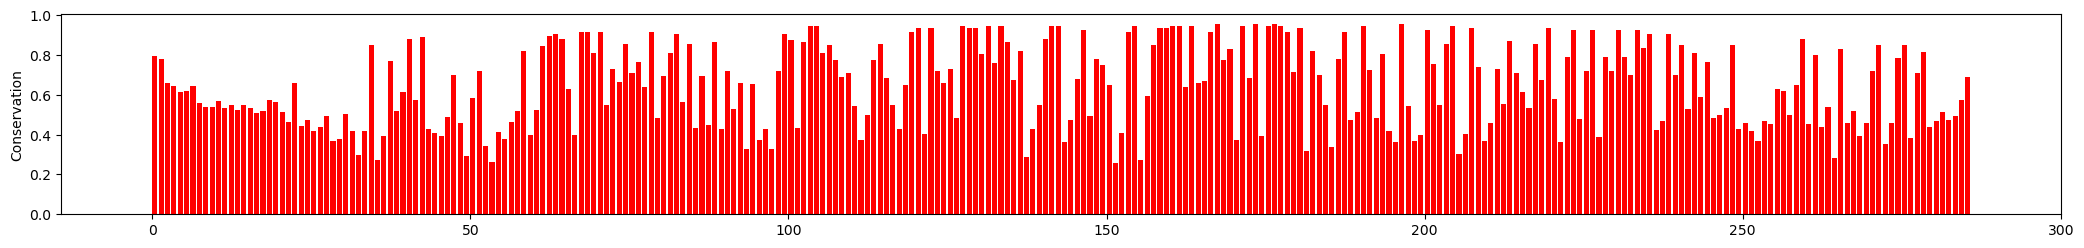

In [ ]:
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#

figure

# 2.2 Shannon entropy 
The entropy H for each position with amino acid frequency p_ia is:

    H = - ∑p_ialog2(p_ia)
    min: H = 0 (all 100 positions equal)
    max: H = 4.321 (each amino acid occurs 5 times in alignment)

- the negative sum of the logarithmus base two multiplied by the proportion of amino acid a is calculated for each amino acid a = 1-20 





C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1321920948.py:4: RuntimeWarning: divide by zero encountered in log2
  log_nmb = freq/N* np.log2(freq/N)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1321920948.py:4: RuntimeWarning: invalid value encountered in multiply
  log_nmb = freq/N* np.log2(freq/N)


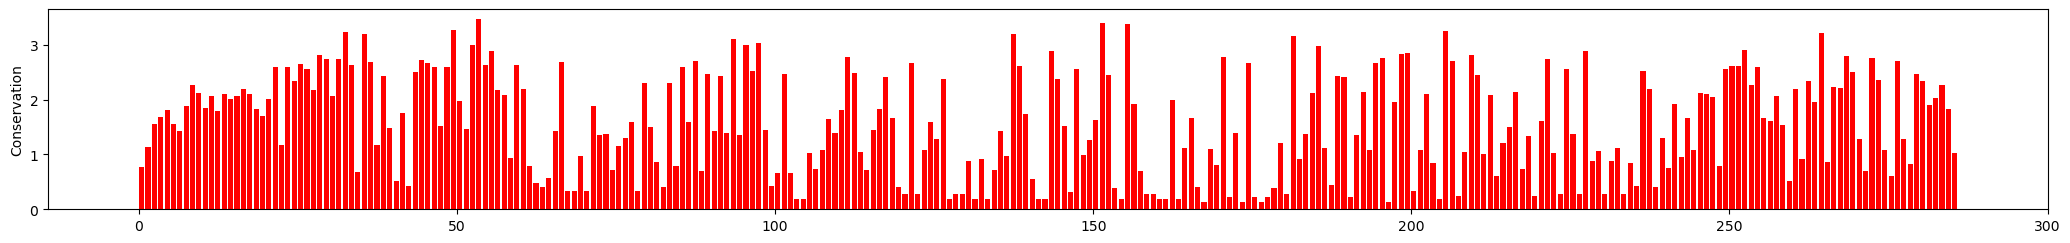

In [ ]:
#positions without occurence of one amino acid have values of -inf (value=0, log=-inf )
# convert them to nan
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = freq/N* np.log2(freq/N)
    log_nmb[ log_nmb == -np.inf] = np.nan 

#ignore nan and calculate the entropy for each position
conservation_Shannon = np.nansum(log_nmb, axis=1,)*-1


figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

figure

# 2.3 Comparision of Pei & Grishin and Shannon conservation
Differences of the conservation scores: 

- Pei & Grishin conservation increases with conservation score whereas conservation decreases with increasing Shannon entropy  

- Shannon entropy measures the amount of disorder for each position which is quite sensitive for rare amino acids occurences

- Pei & Grishin conservation is less senistive because the difference between frequencies instead of their ratio is used to measure the variance

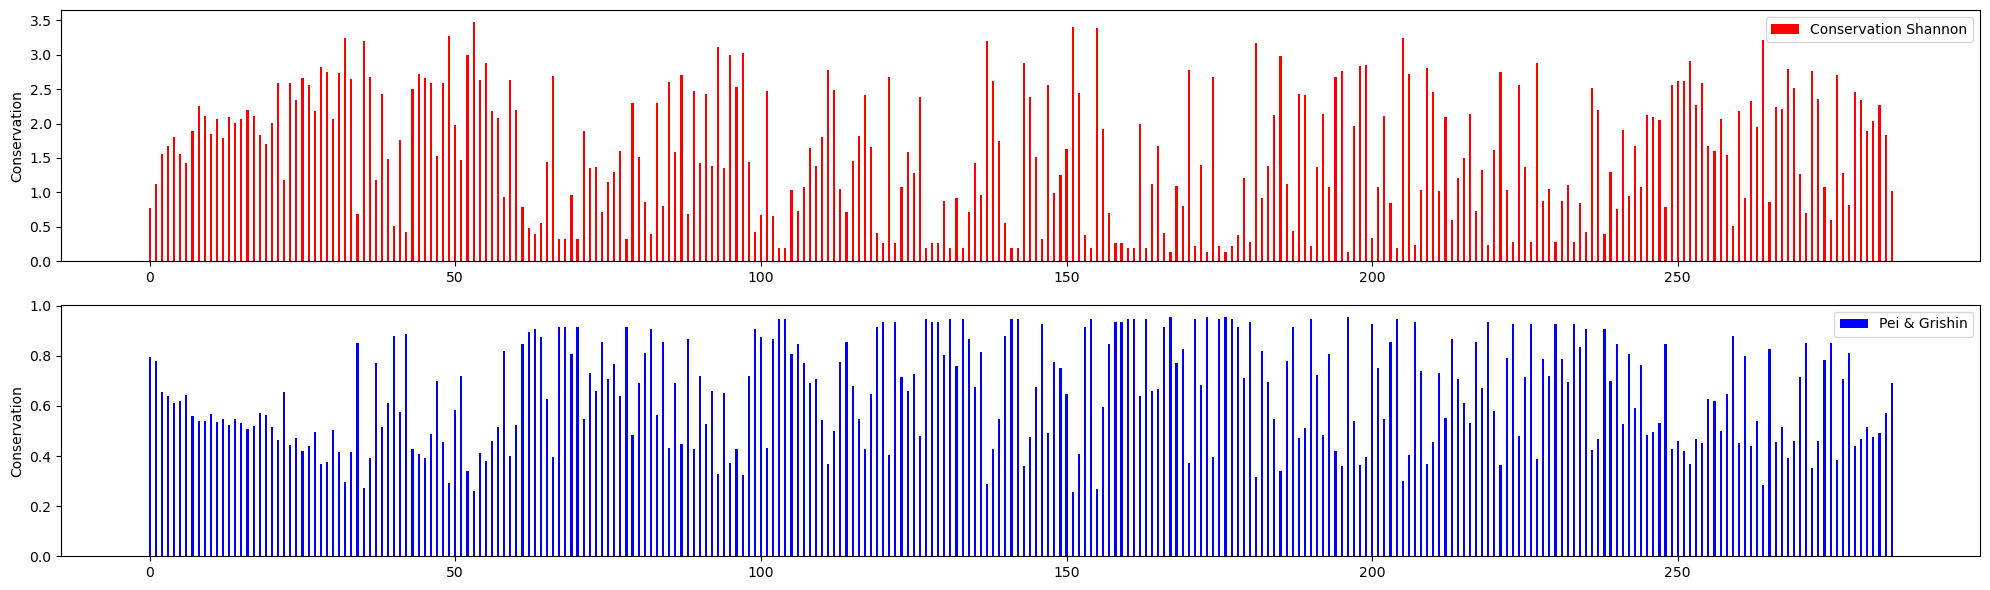

In [ ]:
figure = plt.figure(figsize=(20, 6))
axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

width = 0.35 
x = np.arange(L) 

axes1.bar(x, conservation_Shannon, width, align='center', linewidth=0, color='red', label='Conservation Shannon')
axes1.set_ylabel('Conservation')

axes2.bar(x, conservation, width, align='center', linewidth=0, color='blue', label='Pei & Grishin')
axes2.set_ylabel('Conservation')

spacing_scale = axes1.get_ylim()[1] / 6
spacing = spacing_scale * 2

axes1.legend()
axes2.legend()

plt.tight_layout()
plt.show()

For better comparability, the conservation scores are z-normalizated.  
The scores should be directling opposing to each other after z-normalisation, as the same trend has the opposite sign.

### Export DMS_Conservation.csv

In [ ]:
# Cut signal sequence 0-23 
conservation_core_V = conservation[23:]
conservation_Shannon_cut = conservation_Shannon[23:]

#data frame with mean z-normalized position scores
df_mean = pd.read_pickle('position_means.pkl')
df_DMS_Conserv = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

#adding conservation scores 
df_DMS_Conserv['Pei&Grishin'] = conservation_core_V
df_DMS_Conserv_S = df_DMS_Conserv.copy()
df_DMS_Conserv_S['Conserved_Shannon'] = conservation_Shannon_cut

print(df_DMS_Conserv_S)


         mean_Stiffler_z mean_Deng_z mean_Firnberg_z mean_all_z  Pei&Grishin  \
Position                                                                       
24              0.786898    0.089304          0.8918   0.577701     0.445044   
25               0.89939    0.180497         0.49345   0.510811     0.471359   
26              0.998662    0.670128        0.906685   0.849455     0.419883   
27             -0.510157   -0.255614       -0.514142  -0.426638     0.439056   
28              0.377421    0.132612        0.090621    0.20849     0.495094   
...                  ...         ...             ...        ...          ...   
282            -0.337803    0.463454       -0.376808  -0.083719     0.515465   
283            -0.106276     0.31609       -0.152312   0.019167     0.475500   
284             0.824699    0.420258        0.974941    0.73577     0.492911   
285              0.57407    0.050248        0.486125   0.368077     0.571215   
286            -1.041095   -1.334869    

In [ ]:
#z-normalisation of Shannon conservation und Pei Grishin conservation
df_DMS_Conserv_S_Norm = df_DMS_Conserv_S.copy()

def z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores


df_DMS_Conserv_S_Norm['Conserved_Shannon'] = z_score(df_DMS_Conserv_S['Conserved_Shannon'])
df_DMS_Conserv_S_Norm['Pei&Grishin'] = z_score(df_DMS_Conserv_S['Pei&Grishin'])

#Dataframe export
df_DMS_Conserv_S_Norm.to_csv('DMS_Conservation.csv', index=False)



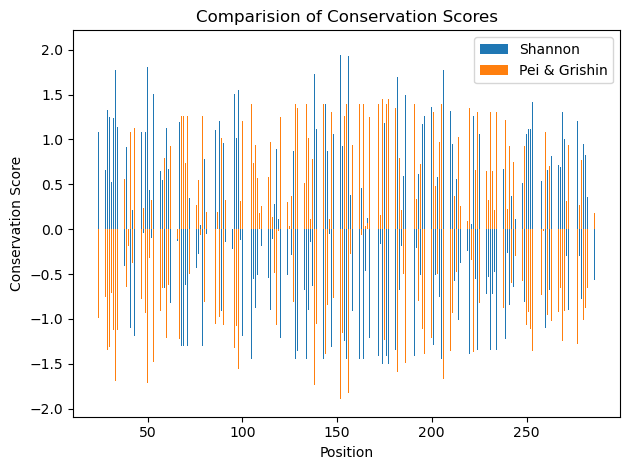

In [ ]:
# P&G and Shannon conservation z-normalized
DMS_Conservation  = pd.read_csv('DMS_Conservation.csv')

x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, DMS_Conservation['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, DMS_Conservation['Pei&Grishin'], width, label='Pei & Grishin')

ax.set_xlabel('Position')
ax.set_ylabel('Conservation Score')
ax.set_title('Comparision of Conservation Scores')
ax.legend()
plt.tight_layout()
plt.show()

Opposite bars mean the same trend and are predominantly represented, also the conservation strength (lenght of bars) seems to be quite equal. 

[[ 1.         -0.99118175]
 [-0.99118175  1.        ]]


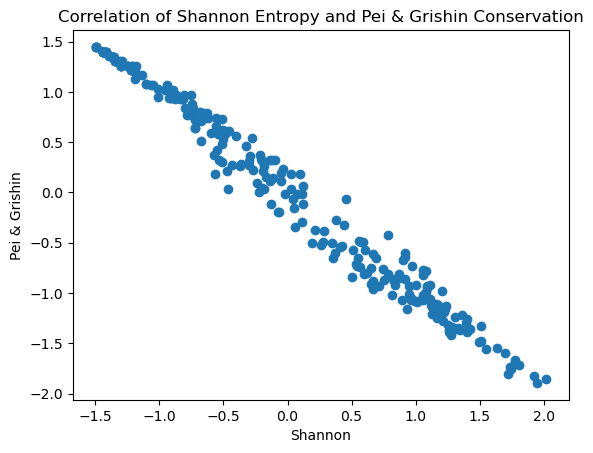

In [ ]:
#Calculation of correlation score 
corr = np.corrcoef(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
print(corr)

plt.scatter(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
plt.xlabel('Shannon')
plt.ylabel('Pei & Grishin')
plt.title('Correlation of Shannon Entropy and Pei & Grishin Conservation')
plt.show()

## Results:
     r = 0.99118175
There is significant correlation between the conservation values of both calculation methods.  
For further approach we deicided to use the Shannon Entropy as it is more sensitive.  


# 3. Comparision of DMS scores and Conservation scores

In the following analysis we are going to verify the following hypothesis: 

1. Highly conserved positions have low DMS scores and are more fragile, we do not assume unneccessary conservation.
2. Bad conserved positions have high DMS scores and are robust for mutations.

 

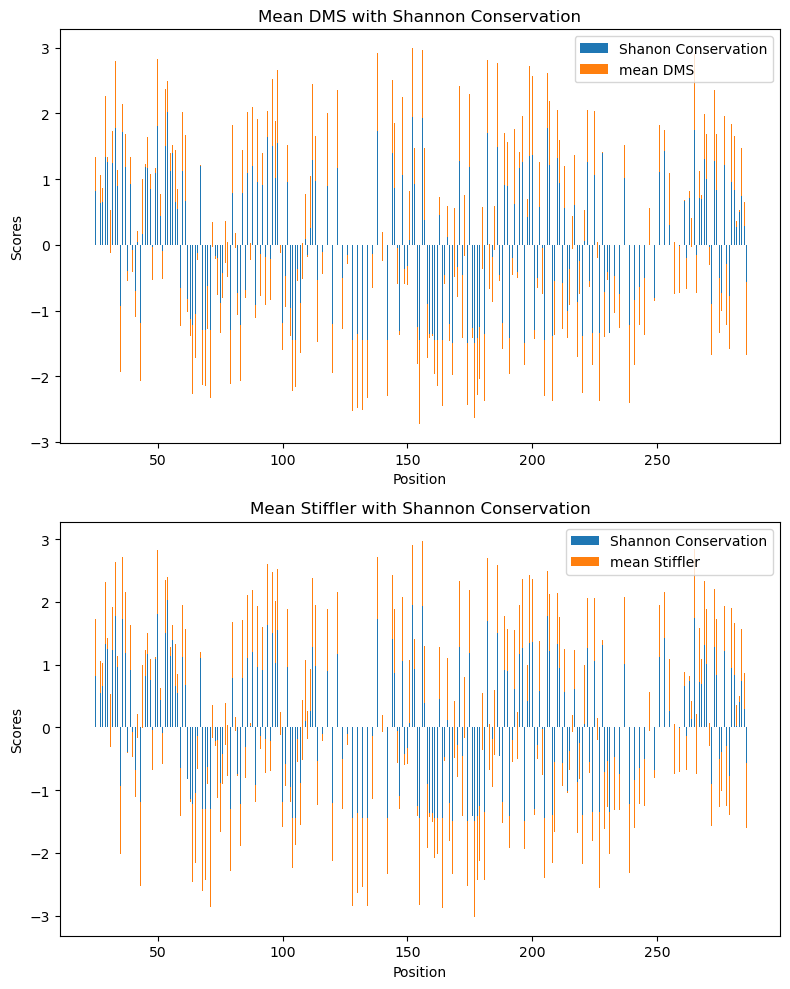

In [ ]:

C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)

x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, C_df_New['Conserved_Shannon'], width, label='Shanon Conservation')
rects2 = ax1.bar(x, C_df_New['mean_all_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, C_df_New['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, C_df_New['mean_Stiffler_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean Stiffler')

ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

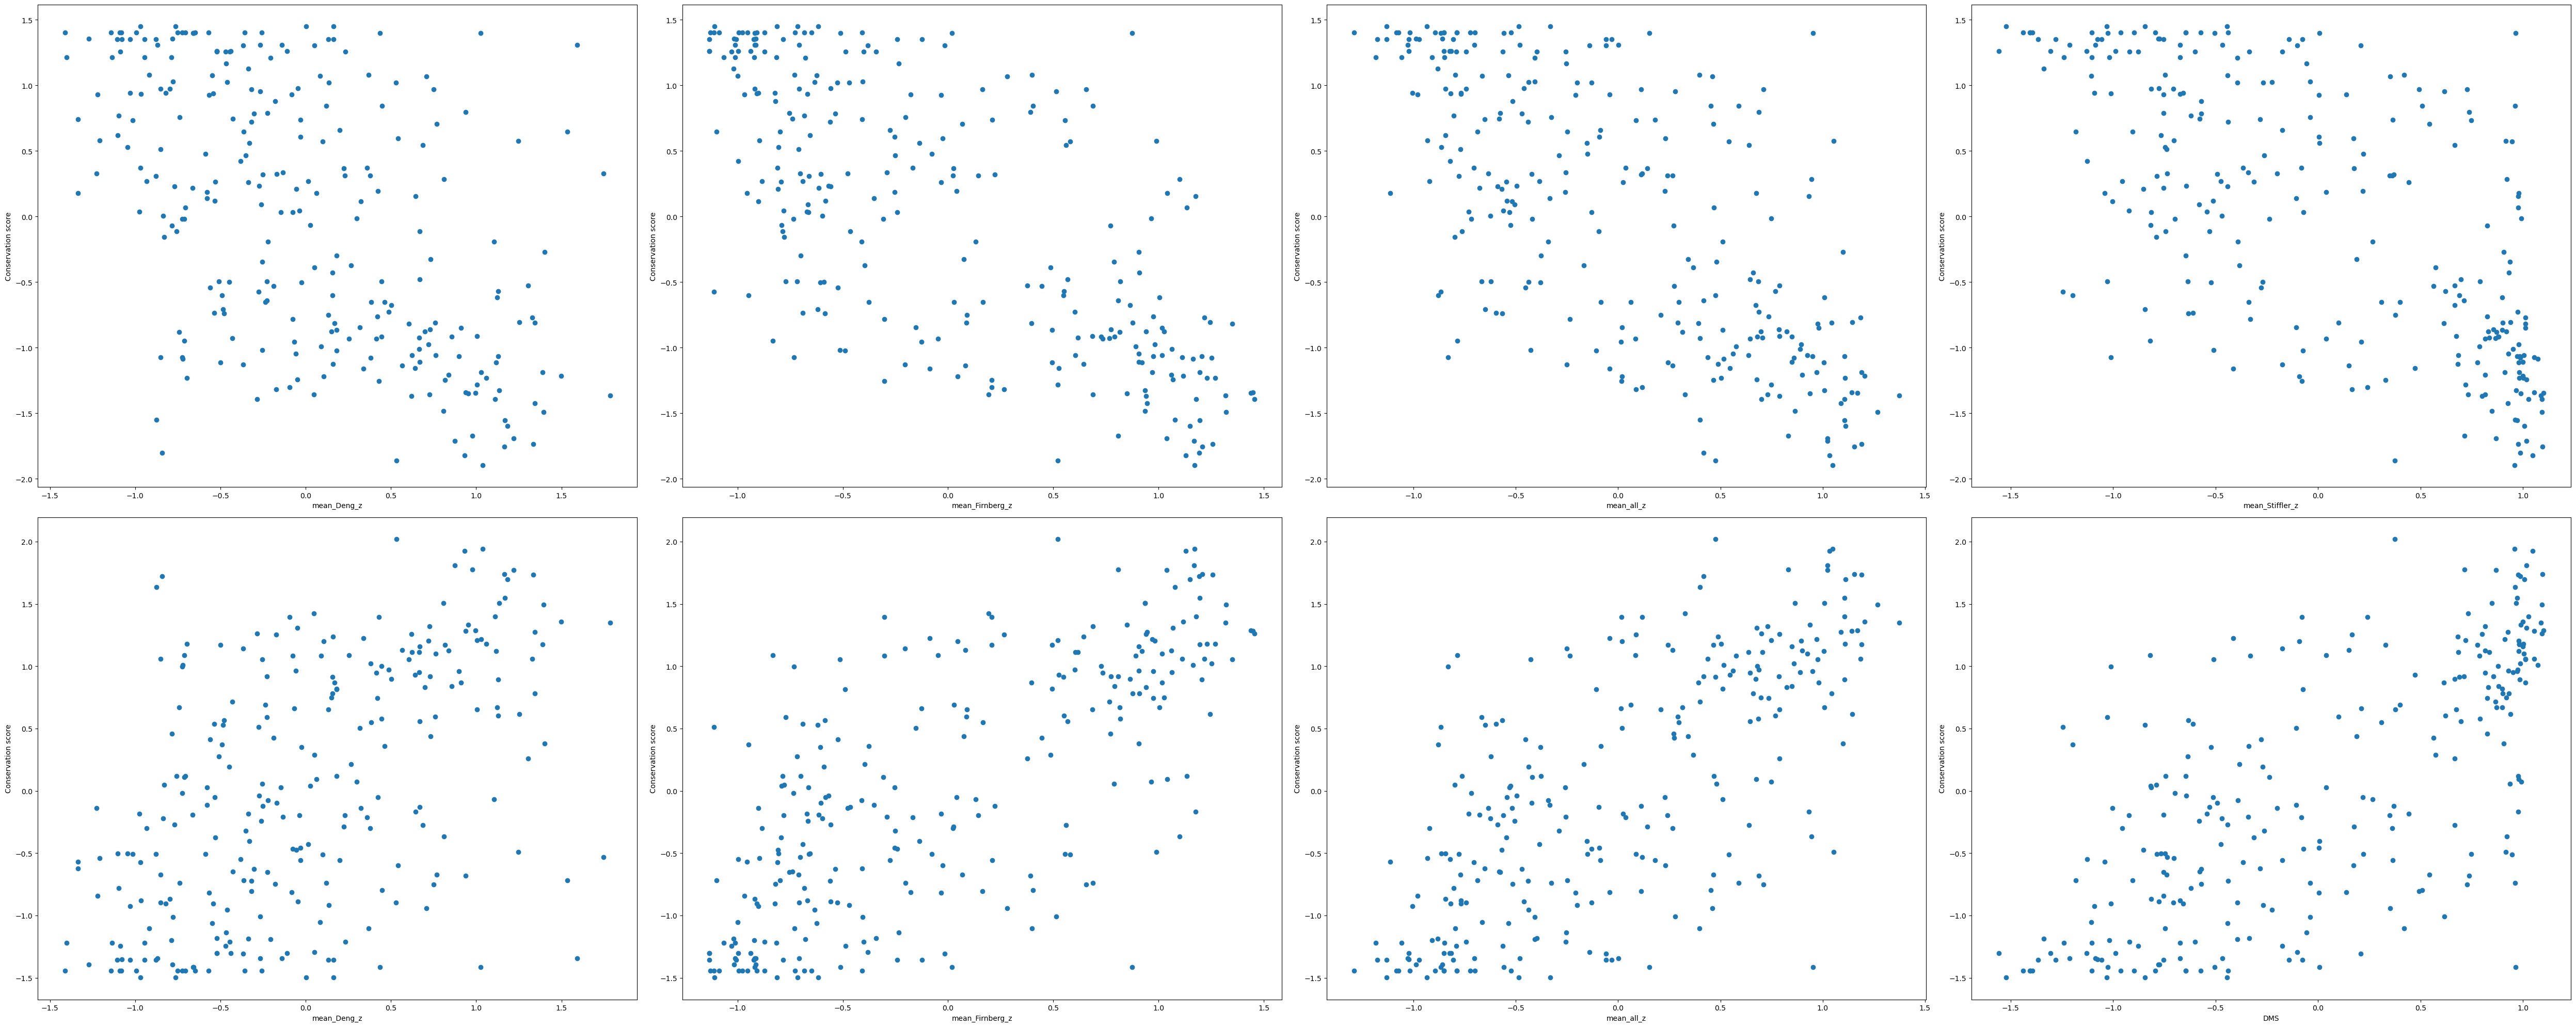

In [ ]:
C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)

fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Pei&Grishin' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Pei&Grishin'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])
        axs[0, i-1].set_xlabel(col)  
        axs[0, i-1].set_ylabel('Conservation score')  
        
        axs[1, i-1].set_xlabel(col)  
        axs[1, i-1].set_ylabel('Conservation score')  


plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

In [ ]:
#Correlation
cor_df = pd.DataFrame(columns =['Shannon', 'Var'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:

        cor_v = C_df_New[col].corr(C_df_New['Pei&Grishin'])
        
        cor_S = C_df_New[col].corr(C_df_New['Conserved_Shannon'])
    
        cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)    

cor_df = cor_df.rename(index={0: 'Stiffler', 1: 'Deng', 2: 'Firnberg', 3: 'Mean', 4 :'variance', 5 : 'Shannon'})
display(cor_df)

#

C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,Shannon,Var
Stiffler,0.695290,-0.667150
Deng,0.539352,-0.533125
Firnberg,0.728481,-0.702616
Mean,0.715928,-0.693817
variance,-0.991182,1.000000
Shannon,1.000000,-0.991182


## Results:

### Scatter plots: 
The scatter plots of Pei and Grsihin (upper row) and Shannon (lower row) with each DMS data set are almost exactly identical but opposed, as the same trend has opposite signs in the conservation formulars.  
Across the DMS data sets ther scatter plots show a consistent picture.  
Two clusters can be detected, located in the corners of high conservation and low DMS scores and low conservation and high DMS scores.  
Both hypothesis can be maintained by these results.

### Correlation scores:
There are only minor differences in the correlation between Shannon and P&G with the datasets.
The absolute correlation values are in range of r = 0.53 - 0.71  

The stiffler data set correlation lays in the middle compared to the other two data sets, therefore it is used as well as the merged model for further analysis.

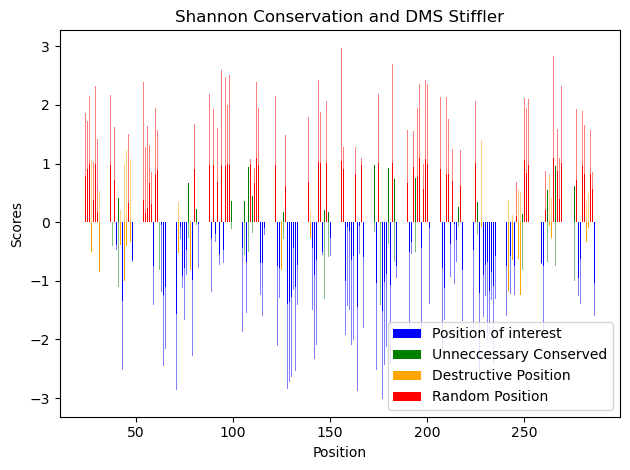

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax1s = plt.subplots()

# Position of interest
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='blue', label='Position of interest')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='red', label='Random Position')

ax1s.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'],0 ),
       color='red', alpha=0.5)

ax1s.set_xlabel('Position')
ax1s.set_ylabel('Scores')
ax1s.set_title('Shannon Entropy of Stiffler mean DMS')
ax1s.legend()

plt.tight_layout()
plt.show()


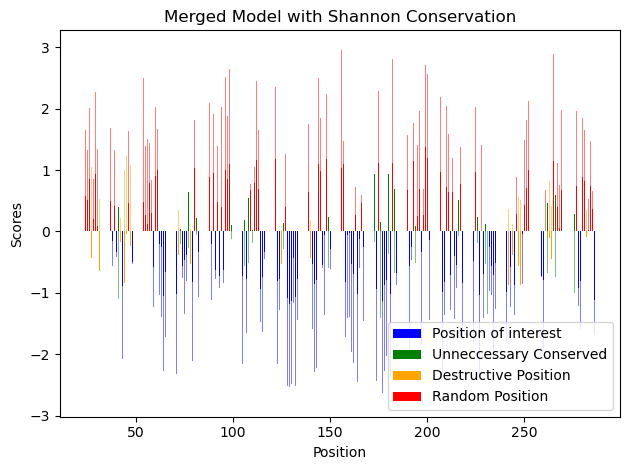

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax2m = plt.subplots()

# Position of interest
ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width, color='blue', label='Position of interest')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, color='red', label='Random Position')

ax2m.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'],0 ),
       color='red', alpha=0.5)

ax2m.set_xlabel('Position')
ax2m.set_ylabel('Scores')
ax2m.set_title('Shannon Entropy of merged model')
ax2m.legend()

plt.tight_layout()
plt.show()

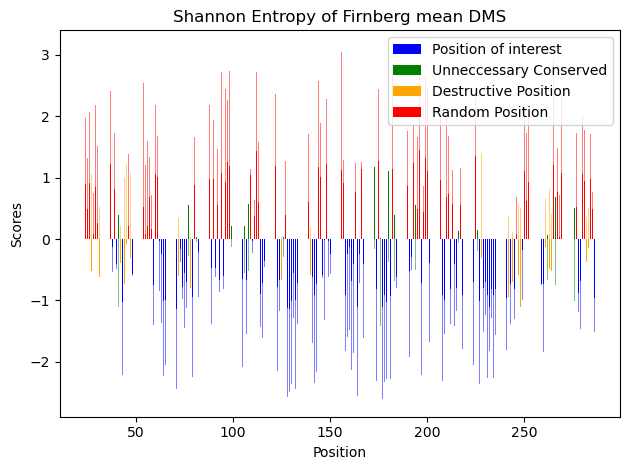

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax3f = plt.subplots()

# Position of interest
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       width, color='blue', label='Position of interest')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Firnberg_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'], 0),
       width, color='red', label='Random Position')

ax3f.bar(x, np.where((C_df_New['mean_Firnberg_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Firnberg_z'],0 ),
       color='red', alpha=0.5)

ax3f.set_xlabel('Position')
ax3f.set_ylabel('Scores')
ax3f.set_title('Shannon Entropy of Firnberg mean DMS')
ax3f.legend()

plt.tight_layout()
plt.show()

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax4d = plt.subplots()

# Position of interest
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       width, color='blue', label='Position of interest')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Deng_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'], 0),
       width, color='red', label='Random Position')

ax4d.bar(x, np.where((C_df_New['mean_Deng_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Deng_z'],0 ),
       color='red', alpha=0.5)

ax4d.set_xlabel('Position')
ax4d.set_ylabel('Scores')
ax4d.set_title('Shannon Entropy of Deng mean DMS')
ax4d.legend()

plt.tight_layout()
plt.show()


## Results:
The following positions can be identified in the bar plots:

1. Position of Interest (blue)
    - DMS negative = Fragile 
    - Conservation = Negative
2. Unnecessary conserved Position (green)
    - DMS positive = Robust
    - Conservation = Negative
3. Random Positions
    - DMS positive = Robust
    - Conservation = Positive
4. Destructive Position
    - DMS negative = Fragile
    - Conservation = Positive

The conservation trends of the four DMS mean data sets are overall consitent, with only recognizable differences in the Deng conservation distribution.  
In all four data sets positions of interest and random positions are predominant, which support the hypothesesis that fragile positions are conserved.
Unnecessary conserved positions are rarely found, except in the deng distribution, in which a cluster of this category appears around position 230. Still the proportion of unneccessarry conserved positions is small across the data sets.That supports that conservation only occurs when necessary.
Destructive position contradict that fragility and conservedness correlate and do appear rarely in all data sets.




# 4. Concensus seqence Alignment with TEM1
The concensus sequence is composed by the most frequent amino acids in the given alignment. Therefore evolutionary conservation could be deduced by the concensus sequence which is core of the following analysis. 
The goal is to find correlation between the concensus sequence conservation and the DMS scores.

The following trends are expected: 

1. Mismatches should only occure at random positions with high DMS and low conservation
2. Fragile positions with high conservation (positions of interest), destructive positions and unneccessary conserved positions should not be among the mismatches
3. Random positions should predominate

### Alignment score
The alignment score is a sum of match, mismatch, gap creation, and gap extension scores
     S= Σ of costs (identities, replacements) - Σ of penalties (number of gaps x gap penalties)
Alignment score is calculated by the following parameters:
(parameters are taken from biopython)
- match score = 1
- mismatch score = -2
- gap score = -2,5 
- opening gap score = -1

Opening gap score:
- the first amino acid or nucleotide inserted/deleted (gap open) found during the alignment  is more significant, than the subsequent ones (gap extension)  
https://seqan.readthedocs.io/en/main/zreferences.html#id24
- appropriate gap scores have been selected over the years by trial and error  
 Pearson, W.R. (1995) "Comparison of methods for searching protein sequence databases." Prhttps://www.ncbi.nlm.nih.gov/BLAST/tutorial/Altschul-1.html#ref13

## 4.1 Self Calculated Concensus sequence alignment (SCA):
- self calculated concensus sequence by Pei and Grishin formula is aligned with TEM-1
- determination of mismatch positions
- categorisation of mismatch type by bar plot 



In [ ]:
#Translation of the concensus sequence in letter code 
aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)


['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'A', '-', '-', '-', '-', 'L', '-', '-', 'V', 'K', 'D', 'A', 'E', 'D', 'Q', 'L', 'G', 'A', 'R', 'V', 'G', 'Y', 'A', 'E', 'L', 'D', 'L', 'A', 'S', 'G', 'K', 'I', 'L', 'E', 'S', 'Y', 'R', 'A', 'D', 'E', 'R', 'F', 'P', 'M', 'M', 'S', 'T', 'F', 'K', 'V', 'L', 'L', 'C', 'G', 'A', 'V', 'L', 'S', 'R', 'V', 'D', 'A', 'G', 'E', 'E', 'Q', 'L', 'D', 'R', 'R', 'I', 'H', 'Y', 'S', 'Q', 'S', 'D', 'L', 'V', 'E', 'Y', 'S', 'P', 'V', 'T', 'E', 'K', 'H', 'L', 'T', 'D', 'G', 'M', 'T', 'V', 'G', 'E', 'L', 'C', 'S', 'A', 'A', 'I', 'T', 'M', 'S', 'D', 'N', 'T', 'A', 'A', 'N', 'L', 'L', 'L', 'T', 'T', 'I', 'G', 'G', 'P', 'K', 'G', 'L', 'T', 'A', 'F', 'L', 'R', 'N', 'I', 'G', 'D', 'H', 'V', 'T', 'R', 'L', 'D', 'R', 'W', 'E', 'P', 'E', 'L', 'N', 'E', 'A', 'I', 'P', 'G', 'D', 'E', 'R', 'D', 'T', 'T', 'T', 'P', 'A', 'A', 'M', 'A', 'T', 'T', 'L', 'R', 'K', 'L', 'L', 'T', 'G', 'E', 'V', 'L', 'S', 'P', 'A',

In [ ]:
#Alignemnet of concensus sequence 

from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()

#score 
Concensus_Calc = ''.join(concensusseq)
score = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, 0.0, 0.0, 0.0)
print(score[0].score)
print(identical[0].score)
#score = pairwise2.align.globalms(Concensus_Calc,msa[0].seq, score_only=True, match_score=1.0, mismatch_score=-1.0, gap_score = -1.5)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)


115.0
229.0
 2 ----L--VKDAEDQLGARVGYAELDLASGKILESYRADERFPMMSTFKVLLCGAVLSRVDAGEEQLDRRIHYSQSDLVEYSPVTEKHLTDGMTVGELCSAAITMSDNTAANLLLTTIGGPKGLTAFLRNIGDHVTRLDRWEPELNEAIPGDERDTTTPAAMATTLRKLLTGEVLSPASRQQLIDWMEADKVAGPLLRSALPAGWFIADKTGAGGRGSRGIIAVLGPDGKPPRIVVIYLTGTQATMDERNAAIAEIGAALI---
       |  ||||||||||||||.||||.|||||||.|..||||||||||||||||||||||||.|||.|||||||.|||||||||||||||||||.||||||||||||||||||||||||||.|||||.|.|||||||||||||||||||.||||||.|||||||||||||||.|..|||||||||||||||||||||||||||||||||.|||.||||||||.|||||||.||||||.||.||||||||..||||||.||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=115



In [ ]:
Concensus_Calc = ''.join(concensusseq)
alignments = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
PG_alignment = alignments[0]

# Get mismatch positions
mismatch_positions_SCA = []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 23 and c1 != c2:
        mismatch_positions_SCA.append(i+1)

# Output mismatch positions
print("Mismatch positions with index > 23:")
print(mismatch_positions_SCA)


Mismatch positions with index > 23:
[25, 26, 27, 29, 30, 45, 50, 58, 60, 61, 86, 90, 98, 118, 145, 151, 153, 173, 180, 196, 198, 199, 233, 237, 246, 254, 261, 264, 273, 274, 281, 284, 285, 286]


C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\2992473812.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mismatch_positions_SCA)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\2992473812.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(mismatch_positions_SCA)


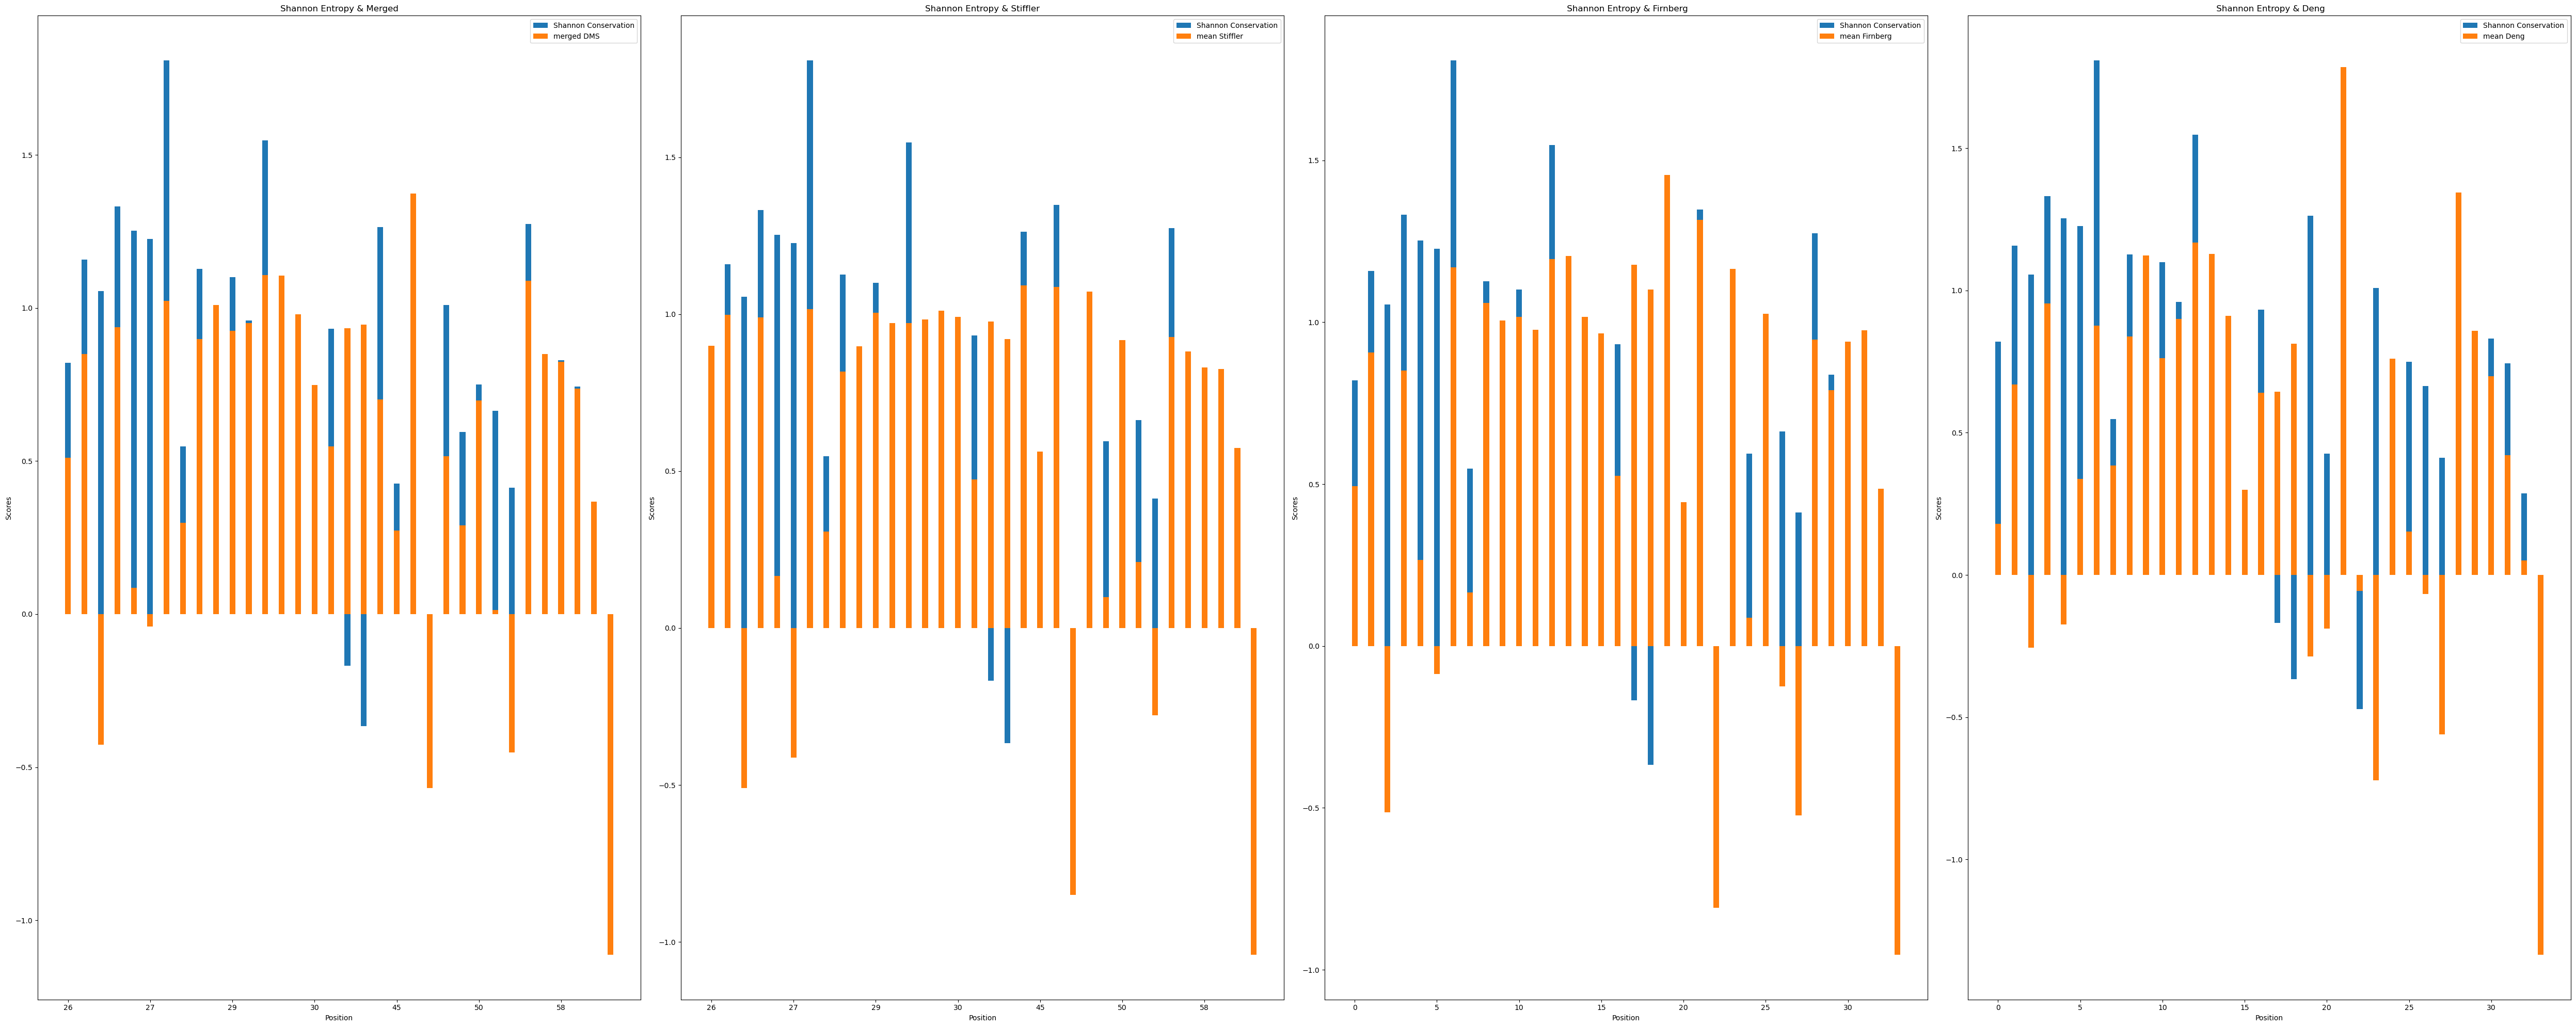

In [43]:
filtered_df_SCA = C_df_New[C_df_New['Position'].isin(mismatch_positions_SCA)]

x = np.arange(len(filtered_df_SCA))
width = 0.35

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4, figsize=(50, 20))

rects1 = ax1.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df_SCA['mean_all_z'], width, label='merged DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Shannon Entropy & Merged')
ax1.legend()

rects3 = ax2.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df_SCA['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_positions_SCA)

ax2.set_xticklabels(mismatch_positions_SCA)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Shannon Entropy & Stiffler')
ax2.legend()

rects5 = ax3.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects6 = ax3.bar(x, filtered_df_SCA['mean_Firnberg_z'], width, label='mean Firnberg')
ax3.set_xlabel('Position')
ax3.set_ylabel('Scores')
ax3.set_title(' Shannon Entropy & Firnberg')
ax3.legend()

rects7 = ax4.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects8 = ax4.bar(x, filtered_df_SCA['mean_Deng_z'], width, label='mean Deng')
ax4.set_xlabel('Position')
ax4.set_ylabel('Scores')
ax4.set_title(' Shannon Entropy & Deng')
ax4.legend()

plt.tight_layout()
plt.show()


## Results:
The DMS mean and conservation distribution of the mismatch position is quite similar in all DMS data sets. Predominantly present are "Random Positions" (DMS and conservation is positive which indicates robustness and variance). Which is consistent with our expectation, as these regions can accumulate mutations without impact.
Positions of interest should be conserved and do not occur except in the deng distribution, while destructive positions and unnecessary conserved positions occur only marginally.  
That is a good result which supports the hypothesis that conservation correlates with DMS.

Merged model:
 - Destructive positions: 2
 - Positions of interest:0
 - unneccessary conserved:2

Stiffler:
  - Positions of interest:0
  - Destructive positions:2
  - unneccesssary conserved:2

Firnberg:
  - Positions of interest:0
  - Destructive positions:2
  - unneccesssary conserved:2

Deng:
  - Positions of interest:1
  - Destructive positions:4
  - unneccesssary conserved:2


Problems: 
 - no gradual differentiation of the varaince in amino acids distribution, only the most frequent one is taken 
                
Further approach: 
 - calculation of conscensus sequence with alignment matrix from Emboss
                


## 4.2 Emboss Concensus Sequence Alignment (ECA)
The following matrixes where used for concensus calculation: 
- Blosum62 as it is the most common matrix
- PAM250 for verification of Blosum62 results
- Blosum90 as a huge proportion of the aligned sequences has aound 90% identity
- PAM460 for reference of bad alignemnt score values 


### PAM Point Accepted Mutation /Percent Accepted Mutation
1 PAM divergenz between two sequences at position i means that one amino acid at position i mutates to the new amino acid with average of 1/100.


### BLOSUM Block Substitution Matrix
BLOCKS = data base of of highly conserved aligned sequences
representing hundredths of protein groups

The blosum percantage quantifies the congruency within the aligned sequences. As we aligned 100 proteins with around 90% similarity Blosum90 is used for following analysis.





In [ ]:
#EMBOSS CONCENSUS EBLOSUM62
with open("emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E62, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)





----------------------A----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---

 2 ----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---
       |  ||  | |||||||   |||.||| | |.| .||||| ||||||||||||||||||.|||.||| ||||||| ||||||||. ||||| ||| ||||||||||||||| |||||| |||||. .|| ||||||||||||||||.| ||||.| ||| |||||| ||.|.  |||||. ||  |||||||||| ||||| ||||.|||  ||| |||.| || |   || ||.| ..|||||||  ||||| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [ ]:
#EMBOSS CONCENSUS PAM250
with open("emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),msa[0].seq.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


----------------------A----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---

 2 ----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---
       |  .|  | |||.|.|   ||| ||. | ..||.||||| ||||||||||.|||.|||||||.|||||||.||. |||.|||||.||||..||| ||||||||||.|||| ||||| .|||||.|||||.|||||||||||||||.| ||||.| ||||||||||.||.|| .|||||||||  |||.||||||.|||||||.||.|||..|||||||.| |||||.||| ||.|..|||||||.  || || .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [ ]:
# PAM250 and Blosum62 how strongly do they match ?
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,seq_Conc_E62, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),seq_Conc_E62.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

2 ----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---
  |||||||.||||||||.|.||||||| ||.|||.|| |||||||||||||||||.|||.|||.||||||| |||.||.||||.||||. ||||. ||||||||||||||.||||||||||  |||||| .|| .|||||||||||||||||||||||||||| |||||| ||||.| |||||. |||||||.|||||| ||||| |.||||||  ||| |||||||| |   ||||||| |.||||||.|||| |||||||||
2 ----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---
  Score=243

243.0


In [ ]:
#EMBOSS CONCENSUS Blosum90
with open("blosum90.txt", "r") as file:
    Conc_B90 = file.read()
    seq_Conc_B90 = Conc_B90.replace("x", "-")
    seq_Conc_B90 = seq_Conc_B90[11:]


score = pairwise2.align.globalms(seq_Conc_B90, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_B90,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_B90.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

 2 -------VK--E-QLGARVG---LD--SGK---SYR-DERFPM-STFK-LLCGAVLSRVDAGQEQLDRRI-YSQ-DLV-YSPVTEKH--DGMTV-ELC-AAITMSDNTAANLLL-TIGGP--LTAFLR-MGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GE-LT--SRQQLI-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIA-L-PD-K---IV-IYLT-TQATMDERN--IA-IG-ALI---
          ||  | |||||||   ||  |||   |.| .||||| |||| |||||||||||||||||.||| ||| ||| ||||||||  ||||| ||| ||||||||||||||| |||||  |||||. ||| ||||||||||||||||.| ||||.| ||| |||||| || ||  |||||| ||  |||||||||| ||||| ||||.|||  ||| ||| | || |   || ||.| .||||||||  || || .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=-1.5

-1.5
193.0


In [ ]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("emboss_cons-I20230625-175340-0830-54160326-p1m.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)



----------------------A--E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---

 2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
     | |  .|| ||.||.|.|   |||..|.  ...||.||||. |||||||||..|||||.|.|.|.||||| ..|||||||||||||.||....|||.||.|.|||||.||||. .||||.||.||...|||.||||||||||||..|.|||||| |.||. .||.||.|.|||..||..|.||. .|.|.|||||..||.||||.|.||.|..||||.|..| |||.|...| .|.|||.|..|||....||.| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

In [ ]:
#Short validation that the alignment with biopython works (Self- alignment of TEM_1) 
with open("Tem1.txt", "r") as file:
    TEM= file.read()
    TEM_S = TEM[84:]#Title goes to Position 84 

score = pairwise2.align.globalms(TEM_S.strip(),str(msa[0].seq.strip()), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(TEM_S.strip(),str(msa[0].seq.strip()), score_only=True)
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(TEM_S.strip(),str(msa[0].seq.strip()), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)
print(identical)
print(score[0].score)

#scoring and alignemnt is correct 

24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
   |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=286

286.0
286.0


# Results: 
1. Emboss Concensus Alignment:
- The match scores from all three ECA's are nearly identical (range = 193 -195)
- The scores from Blosum62 (score = 2) and PAM250 (score = -1) differ more than between Blosum90 (-1.5) and PAM250. That is inconsistent with the fact that PAM250 and Blosum62 should lead to similar results and questions the alignments correctness. In order to assess the significance of the figures from the alignments, PAM460 was calculated for a poor reference value.


    - PAM460 alignment score (score = -94.5) differs by 93-96.5 scoring points from the previous ECA's.  
    Concludingly Blosum62, Blosum90 and PAM250 concensus sequences are very similar and the difference in the alignment scores can be neglected.

2. Emboss Concensus Alignment (ECA) vs. Self calculated Alignemnt(SCA):
The self calculated concensus sequence is inaccurate because only the most frequent amino acid in the alignment is taken. Whereas the emboss alignemnts calculates the concensus sequence based on big data sets and mathematical constructed matrixes.
Therefore it can be assuemed that the the concensus sequences from ECA are more valid than SCA.  

However the quality of the alignment itself was found to be higher for SCA (score = 115) than of ECA (score = -1.5/-1). Because the high number of matches lowers the alignments cost (SCA score = 229, ECA score = 193-195).

3. Optimisation of concensus sequence by calculating the sequence with emboss Blosum90 and aligning it with emboss Blosum90 clould lead to a better alignment score while maintaining a more valid concensus sequence.



# 4.3. Reference Emboss alignment


In [ ]:
from Bio import AlignIO
dict = {}
Needle = r'Needle_B90.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
print(dict)
#0 = TEM, 1 = Concensus

#Alignment of Blosum90 with TEM-1 from Emboss
alignmentB90 = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)
seq_B90_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), alignmentB90[0].score, 23,308, full_sequences= False ) 
print(seq_B90_TEM)
print(alignmentB90[0].score)
print(identical)

{0: Seq('MSIQHFRVALIPFFAAFCLPVFAHPETLVK------------------------...KHW'), 1: Seq('------------------------------xxxxxxxxxxxxxxxxxxxxxxAx...xxx')}
24 HPETLVK------------------------------VKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEI
                                        ||..|.|||||||...||..|||...|.|..|||||.||||.|||||||||||||||||.|||.|||.|||.||||||||..|||||.|||.|||||||||||||||.|||||..|||||..|||.||||||||||||||||.|.||||.|.|||.||||||.||.||..||||||.||..||||||||||.|||||.||||.|||..|||.|||.|.||.|...||.||.|..||||||||..||.|
 1 -------xxxxxxxxxxxxxxxxxxxxxxAxxxxxxxVKxxExQLGARVGxxxLDxxSGKxxxSYRxDERFPMxSTFKxLLCGAVLSRVDAGQEQLDRRIxYSQxDLVxYSPVTEKHxxDGMTVxELCxAAITMSDNTAANLLLxTIGGPxxLTAFLRxMGDxVTRLDRWEPELNEAIPGDxRDTTTPxAMAxTLRKLLxGExLTxxSRQQLIxWMxxDKVAGPLLRSxLPAGWxIADKTGAGxxGSRxIIAxLxPDxKxxxIVxIYLTxTQAT

In [ ]:
#gap which needs to be subtracted to get the actuall TEM-1 position
len(str('------------------------------'))


30

In [ ]:
#Get  mismatch positions
PG_alignment = alignmentB90[0]
mismatch_position_90= []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 59 and c1 != c2:
        mismatch_position_90.append(i+1-30)
        
print("Mismatch positions with index > 23:")
print(mismatch_position_90)


Mismatch positions with index > 23:
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 66, 74, 75, 76, 79, 80, 84, 85, 86, 88, 90, 91, 97, 102, 120, 124, 128, 132, 141, 142, 148, 152, 168, 174, 175, 181, 182, 186, 203, 205, 210, 212, 216, 223, 226, 229, 230, 237, 240, 241, 252, 258, 263, 267, 268, 272, 276, 278, 281, 283, 284, 285, 288, 291, 293, 294, 303, 304, 307, 310, 311, 314, 315, 316]


C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\2911267450.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mismatch_position_90)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\2911267450.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(mismatch_position_90)


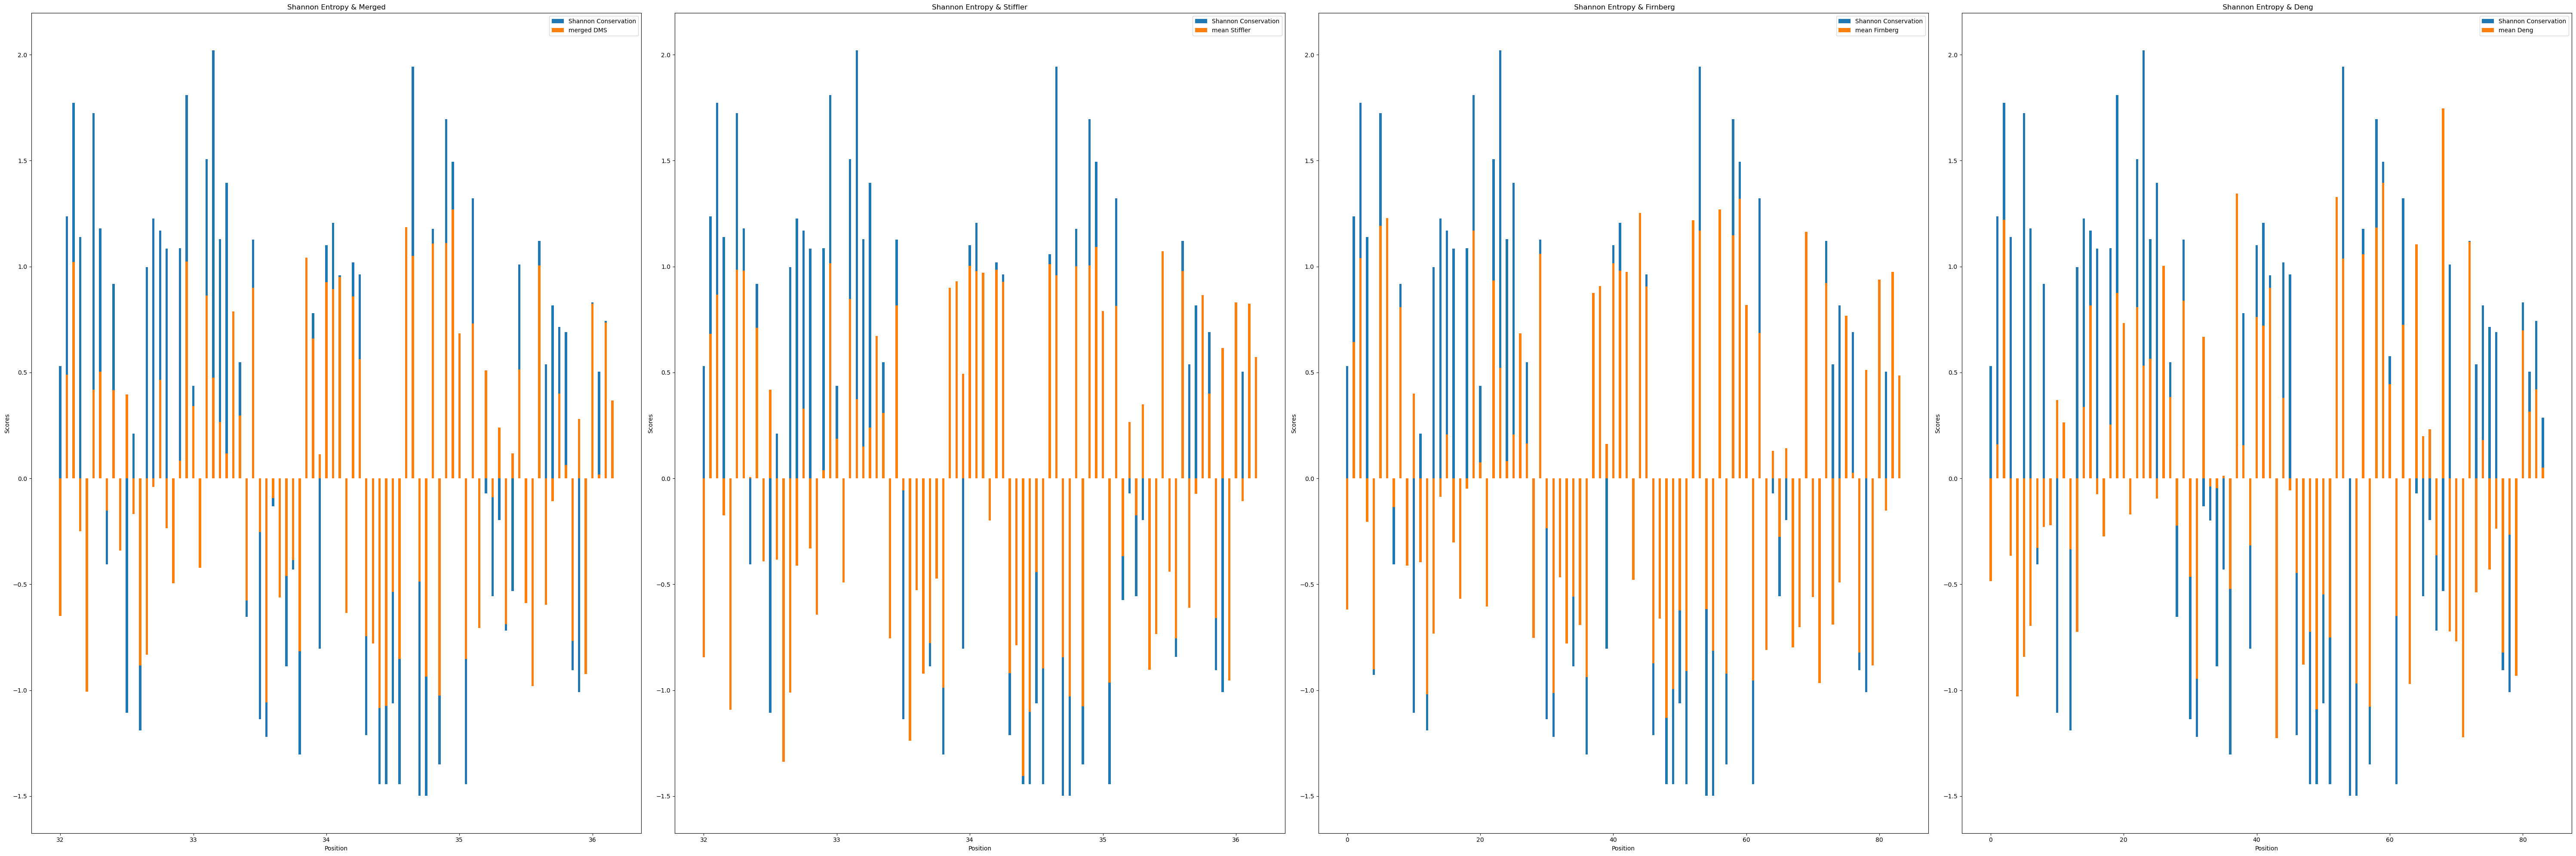

In [ ]:
filtered_df = C_df_New[C_df_New['Position'].isin(mismatch_position_90)]

x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4, figsize=(60, 20))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='merged DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Shannon Entropy & Merged')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_position_90)
ax2.set_xticklabels(mismatch_position_90)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Shannon Entropy & Stiffler')
ax2.legend()

rects5 = ax3.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects6 = ax3.bar(x, filtered_df['mean_Firnberg_z'], width, label='mean Firnberg')
ax3.set_xlabel('Position')
ax3.set_ylabel('Scores')
ax3.set_title(' Shannon Entropy & Firnberg')
ax3.legend()

rects7 = ax4.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects8 = ax4.bar(x, filtered_df['mean_Deng_z'], width, label='mean Deng')
ax4.set_xlabel('Position')
ax4.set_ylabel('Scores')
ax4.set_title(' Shannon Entropy & Deng')
ax4.legend()

plt.tight_layout()
plt.show()


## Results
  Alignment score = 25  
  Matches = 222

Compared to the previous blosum90 alignment, both the match score and the alignment score are higher and indicate a better quality (lower cost) within the alignment.


The bar plots of all data sets are mostly consistent. In contrast to the SCA random positions do not predominate and no uniform distribution is detectable. Instead random positions and positions of interest seem to be equaly present. While random positions are consistent with our hypothesis, the huge number of positions of interest conflicts with our expectation as they should be conserved and not appear in the mismatch group. Moreover destructive positions and unneccessary positions are also found in the mismatch group. While in the deng data set unnecessary conserved position appear more often than in the other data sets. 

Overall that suggests that the emboss alignment is not significantly better than the previous alignments. 

# 5. Extended: DMS trend at important positions

Important positions which are expected to be conserved and fragile: 
- Active site : 68,166
- Binding site: 232-234
- Disulfid bond: 75-121

    

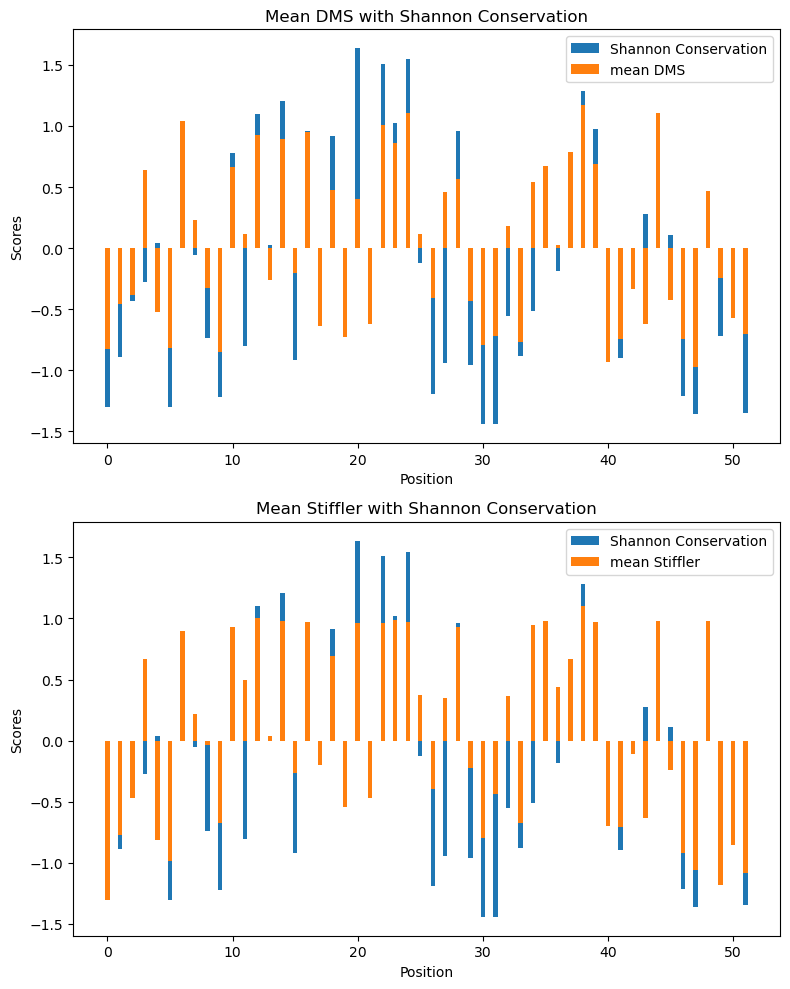

In [ ]:
# Positions
active_site = [68, 166]
binding_site = list(range(232, 235))  
disulfid_bond = list(range(75, 122))  
positions = active_site + binding_site + disulfid_bond

filtered_df = C_df_New[C_df_New['Position'].isin(positions)]


x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')


ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

Both barplots are predominantly composed of random positions and positions of interest. The proportion of destructive position is negligible low, similar to the rarely frequent unnecessary conserved positions. 

Merged model:
 - Destructive positions: 4
 - unneccessary conserved:5

Stiffler:
  - Destructive positions:3
  - unneccesssary conserved:7

In [ ]:
# Calculation of the average DMS
mean_by_column = C_df_New.loc[C_df_New['Position'].isin(positions)].mean()
print(mean_by_column)



mean_Stiffler_z        0.063633
mean_Deng_z           -0.062993
mean_Firnberg_z       -0.003927
mean_all_z             0.000635
Pei&Grishin            0.171609
Conserved_Shannon     -0.131827
Position             106.519231
dtype: float64


## Results:
We expected that functional and structural important positions have higbh conservation and low DMS and belong to the category of positions of interest. 
In the bar plot the proportion of positions of interest is quite equal to the proportion of random positions which have low conservation but high robustness. 

DMS:
Overall there is a high proportion of robust positions which contradicts our hypothesis, that important positions are fragile. 
The mean DMS values of the important positions lay around -0.063 to 0.063. Which is close to mean fitness, so we can not approve our expectation, that the DMS is more negative in this regions.

Conservation:
To be recognized on the conservation scores which lay around 0 (mean conservation) it can not be confirmed that important positions are higher or lower conserved as other positions.

    mean_Stiffler_z        0.063633
    mean_Deng_z           -0.062993
    mean_Firnberg_z       -0.003927
    mean_all_z             0.000635

    Pei&Grishin            0.171609
    Conserved_Shannon     -0.131827

# 6. Extended Hypothesis testing 
1. Assign each position as match or mismatch by the blosum62 matrix
2. Check for normal distribution within the assigned position groups
3. Apply wilcoxon signed ranked test 

In [ ]:
#Alignment of Blosum62 with TEM-1

score = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)

seq_Bl62_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), score[0].score, 23,308, full_sequences= False ) 


def process_alignment(alignments):
    
    lines = alignments.strip().split('\n')
    alignment_lines = lines[0:3]
    seq1 = alignment_lines[0]
    seq2 = alignment_lines[2]

    df = pd.DataFrame(columns=['Position', 'Blossum62', 'TEM-1', 'Status'])

    for i in range(len(seq1)):
        aa1 = seq1[i]
        aa2 = seq2[i]

        if aa1 == aa2:
            status = 'Identical'
        elif aa1 == '-' or aa2 == '-':
            status = 'Gap'
        else:
            status = 'Different'

        df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)

    return df

result = process_alignment(seq_Bl62_TEM)

Concen_Align_Result = result.copy()

print(result)

C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The

    Position Blossum62 TEM-1     Status
0          1         2        Different
1          2         4     1  Different
2          3                  Identical
3          4         H     -        Gap
4          5         P     -        Gap
..       ...       ...   ...        ...
283      284         Q     x  Different
284      285         I     I  Identical
285      286         A     A  Identical
286      287         E     x  Different
287      288         I     I  Identical

[288 rows x 4 columns]


C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_23716\515214517.py:29: FutureWarning: The

## 1. Data frame with mean DMS and alignment positions

In [ ]:
df_mean = pd.read_pickle('position_means.pkl')

df_mean_c = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

Concen_Align_Result['mean'] = df_mean_c['mean_all_z']
Concen_Align_Result['Stiffler'] = df_mean['mean_Stiffler_z'].shift(-1)

Concen_Align_Result = Concen_Align_Result.reset_index(drop=True)


Concen_Align_Result_short = Concen_Align_Result.iloc[23:286,:6]
print(Concen_Align_Result_short)
print (df_mean_c)

    Position Blossum62 TEM-1     Status      mean  Stiffler
23        24         -     x        Gap       NaN       NaN
24        25         -     x        Gap  0.577701   0.89939
25        26         -     x        Gap  0.510811  0.998662
26        27         -     x        Gap  0.849455 -0.510157
27        28         -     x        Gap -0.426638  0.377421
..       ...       ...   ...        ...       ...       ...
281      282         N     N  Identical  0.824915 -0.337803
282      283         R     x  Different -0.083719 -0.106276
283      284         Q     x  Different  0.019167  0.824699
284      285         I     I  Identical   0.73577   0.57407
285      286         A     A  Identical  0.368077 -1.041095

[263 rows x 6 columns]
         mean_Stiffler_z mean_Deng_z mean_Firnberg_z mean_all_z
Position                                                       
24              0.786898    0.089304          0.8918   0.577701
25               0.89939    0.180497         0.49345   0.510811


## 2. Shapiro test 

In [45]:
data_identical = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Identical']['mean']
data_different = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Different']['mean']

from scipy.stats import shapiro

data = Concen_Align_Result_short['mean'].dropna()  

Shapiro-Wilk-Test
statistic, p_value = shapiro(data)
print('Shapiro-Wilk-Test match:', statistic)
print('Shapiro-Wilk-Test p-value:', p_value)


data = data_different
statistic, p_value = shapiro(data)
print('Shapiro-Wilk-Test mismatch:', statistic)
print('Shapiro-Wilk-Test p-value:', p_value)

NameError: name 'Shapiro' is not defined

## Results from Shapiro test: 
- no normal distribution in the assigned position groups

## 3. Wilcoxon Rank Sum Test 
Testing if groups of match and mismatch positions show group specific DMS trends. 

H0 = No difference in the distribution of DMS scores in match and mismatch groups
- Two sided test

Problem:
Not the same size of both groups
- matches = 193 
- mismatches = 69

Approach:
Random loop which picks 69 values in the match group
  

In [44]:
import random
from scipy.stats import wilcoxon

num_iterations = 15000
test_statistics = []
p_values = []

for _ in range(num_iterations):
    # choose random 69 values of the match group 
    random_identical_data = random.sample(list(data_identical ), 69)

    # Wilcoxon- test
    statistic, p_value = wilcoxon(random_identical_data, data_different)
    test_statistics.append(statistic)
    p_values.append(p_value)


mean_test_statistic = sum(test_statistics) / len(test_statistics)
mean_p_value = sum(p_values) / len(p_values)

print(mean_test_statistic)
print(mean_p_value)

ValueError: The samples x and y must have the same length.

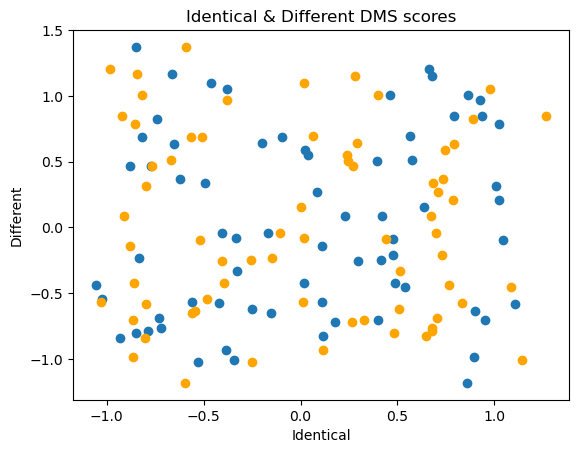

In [ ]:
plt.scatter(data_identical[0:69], data_different)
plt.scatter(data_identical[124:193], data_different, color = 'orange')
plt.xlabel('Identical')
plt.ylabel('Different')
plt.title('Identical & Different DMS scores')
plt.show()

## Result: 

 1000 Runs: 
     - Average test statistics: 1124.909
     - Average p-value: 0.6478203616373306

    10000 Runs:
     - Average test statistics: 1122.9197
     - Average p-value: 0.641155545963515

     15000 Runs: 
    -  Average test statistics: 1123.9102666666668
    - Average p-value: 0.6434579695313134

    18000 Runs: 
    - Average test statistics: 1122.7196666666666
    - Average p-value: 0.6405447963911712

p-value is not significant:
  - H0 hypothesis can not be rejected, as there is no significant difference in the distribution od the DMS values in the match or mismatch regions. 
    